In [1]:
library('tidyverse')
library('readr')
library('dplyr')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


### First, we will examine the ranking of dog breeds from 2013 to 2020. We begin by examining the dataset. 

In [2]:
breed_rank = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_rank.csv', show_col_types = TRUE)

breed_rank |> head()

Rows: 195 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Breed, links, Image
dbl (8): 2013 Rank, 2014 Rank, 2015 Rank, 2016 Rank, 2017 Rank, 2018 Rank, 2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Breed,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank,links,Image
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Retrievers (Labrador),1,1,1,1,1,1,1,1,https://www.akc.org/dog-breeds/labrador-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Labrador-Retriever-illustration.jpg
French Bulldogs,11,9,6,6,4,4,4,2,https://www.akc.org/dog-breeds/french-bulldog/,https://www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg
German Shepherd Dogs,2,2,2,2,2,2,2,3,https://www.akc.org/dog-breeds/german-shepherd-dog/,https://www.akc.org/wp-content/uploads/2017/11/German-Shepherd-Dog-Illo-2.jpg
Retrievers (Golden),3,3,3,3,3,3,3,4,https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Golden-Retriever-Illo-2.jpg
Bulldogs,5,4,4,4,5,5,5,5,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11/Bulldog-Illo-2.jpg
Poodles,8,7,8,7,7,7,6,6,https://www.akc.org/dog-breeds/poodle-standard/,https://www.akc.org/wp-content/uploads/2017/11/Standard-Poodle-illustration.jpg


### We can also view the data set as a tibble to get an idea of how many rows there are. We can also use the nrows() command.

In [3]:
breed_rank |> as_tibble() |> print()

# A tibble: 195 × 11
   Breed   2013 …¹ 2014 …² 2015 …³ 2016 …⁴ 2017 …⁵ 2018 …⁶ 2019 …⁷ 2020 …⁸ links
   <chr>     <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl> <chr>
 1 Retrie…       1       1       1       1       1       1       1       1 http…
 2 French…      11       9       6       6       4       4       4       2 http…
 3 German…       2       2       2       2       2       2       2       3 http…
 4 Retrie…       3       3       3       3       3       3       3       4 http…
 5 Bulldo…       5       4       4       4       5       5       5       5 http…
 6 Poodles       8       7       8       7       7       7       6       6 http…
 7 Beagles       4       5       5       5       6       6       7       7 http…
 8 Rottwe…       9      10       9       8       8       8       8       8 http…
 9 Pointe…      13      12      11      11      10       9       9       9 http…
10 Dachsh…      10      11      13      13      13      12      11      10 http…
# … wit

In [4]:
breed_rank |> nrow()  

[1] 195

### There are 195 breeds listed. This is too many to really get a handle on, so let's examine the top ten breeds over each of the eight years in our dataset. First, we need to filter by the top 10 breeds in each year. The way we will filter this will examine top 10 breeds in EVERY year for all of the years listed so in the end we have 7 breeds included. We can then use the head and tail commands to view the top and bottom breed rankings.

In [5]:
Top10_breed_rank = breed_rank |>
    filter(`2020 Rank`<=10,`2019 Rank`<=10,`2018 Rank`<=10,`2017 Rank`<=10,`2016 Rank`<=10,`2015 Rank`<=10,`2014 Rank`<=10,`2013 Rank`<=10)


Top10_breed_rank |> head() 
Top10_breed_rank |> tail()

Breed,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank,links,Image
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Retrievers (Labrador),1,1,1,1,1,1,1,1,https://www.akc.org/dog-breeds/labrador-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Labrador-Retriever-illustration.jpg
German Shepherd Dogs,2,2,2,2,2,2,2,3,https://www.akc.org/dog-breeds/german-shepherd-dog/,https://www.akc.org/wp-content/uploads/2017/11/German-Shepherd-Dog-Illo-2.jpg
Retrievers (Golden),3,3,3,3,3,3,3,4,https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Golden-Retriever-Illo-2.jpg
Bulldogs,5,4,4,4,5,5,5,5,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11/Bulldog-Illo-2.jpg
Poodles,8,7,8,7,7,7,6,6,https://www.akc.org/dog-breeds/poodle-standard/,https://www.akc.org/wp-content/uploads/2017/11/Standard-Poodle-illustration.jpg
Beagles,4,5,5,5,6,6,7,7,https://www.akc.org/dog-breeds/beagle/,https://www.akc.org/wp-content/uploads/2017/11/Beagle-Illo-2.jpg


Breed,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank,links,Image
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
German Shepherd Dogs,2,2,2,2,2,2,2,3,https://www.akc.org/dog-breeds/german-shepherd-dog/,https://www.akc.org/wp-content/uploads/2017/11/German-Shepherd-Dog-Illo-2.jpg
Retrievers (Golden),3,3,3,3,3,3,3,4,https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Golden-Retriever-Illo-2.jpg
Bulldogs,5,4,4,4,5,5,5,5,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11/Bulldog-Illo-2.jpg
Poodles,8,7,8,7,7,7,6,6,https://www.akc.org/dog-breeds/poodle-standard/,https://www.akc.org/wp-content/uploads/2017/11/Standard-Poodle-illustration.jpg
Beagles,4,5,5,5,6,6,7,7,https://www.akc.org/dog-breeds/beagle/,https://www.akc.org/wp-content/uploads/2017/11/Beagle-Illo-2.jpg
Rottweilers,9,10,9,8,8,8,8,8,https://www.akc.org/dog-breeds/rottweiler/,https://www.akc.org/wp-content/uploads/2017/11/Rottweiler-Illo-2.jpg


### We can use the pivot_longer command to view the year and rank as rows. We can rename the columns for year (previously listed as 'name') and rank (previously listed as 'value') to keep track of what they represent. 

In [6]:

Top10_breed_rank = breed_rank |>
    filter(`2020 Rank`<=10,`2019 Rank`<=10,`2018 Rank`<=10,`2017 Rank`<=10,`2016 Rank`<=10,`2015 Rank`<=10,`2014 Rank`<=10,`2013 Rank`<=10, na.rm = TRUE) |>
    pivot_longer(cols = c('2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank', '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank')) |>
    mutate('Year' =  name, Rank = value) |>
    select(Year, Breed, Rank)

Top10_breed_rank |> head()
Top10_breed_rank |> tail()


Year,Breed,Rank
<chr>,<chr>,<dbl>
2013 Rank,Retrievers (Labrador),1
2014 Rank,Retrievers (Labrador),1
2015 Rank,Retrievers (Labrador),1
2016 Rank,Retrievers (Labrador),1
2017 Rank,Retrievers (Labrador),1
2018 Rank,Retrievers (Labrador),1


Year,Breed,Rank
<chr>,<chr>,<dbl>
2015 Rank,Rottweilers,9
2016 Rank,Rottweilers,8
2017 Rank,Rottweilers,8
2018 Rank,Rottweilers,8
2019 Rank,Rottweilers,8
2020 Rank,Rottweilers,8


### Now lets plot the Breed Rank over the 8 year period. Think about which variables we want for the x-axis and y-axis. One way to plot this is Breed Rank by Year. We have already filtered by the top ten rankings per year and appropriately renamed these columns. We can rename the x scale marks to simply state the year, rather than 'Year Rank.' We can also add labels and a title. Lastly, let's annotate to bring attention to the fact that the same breed has remained at the number 1 ranking throughout the time period.  

NULL

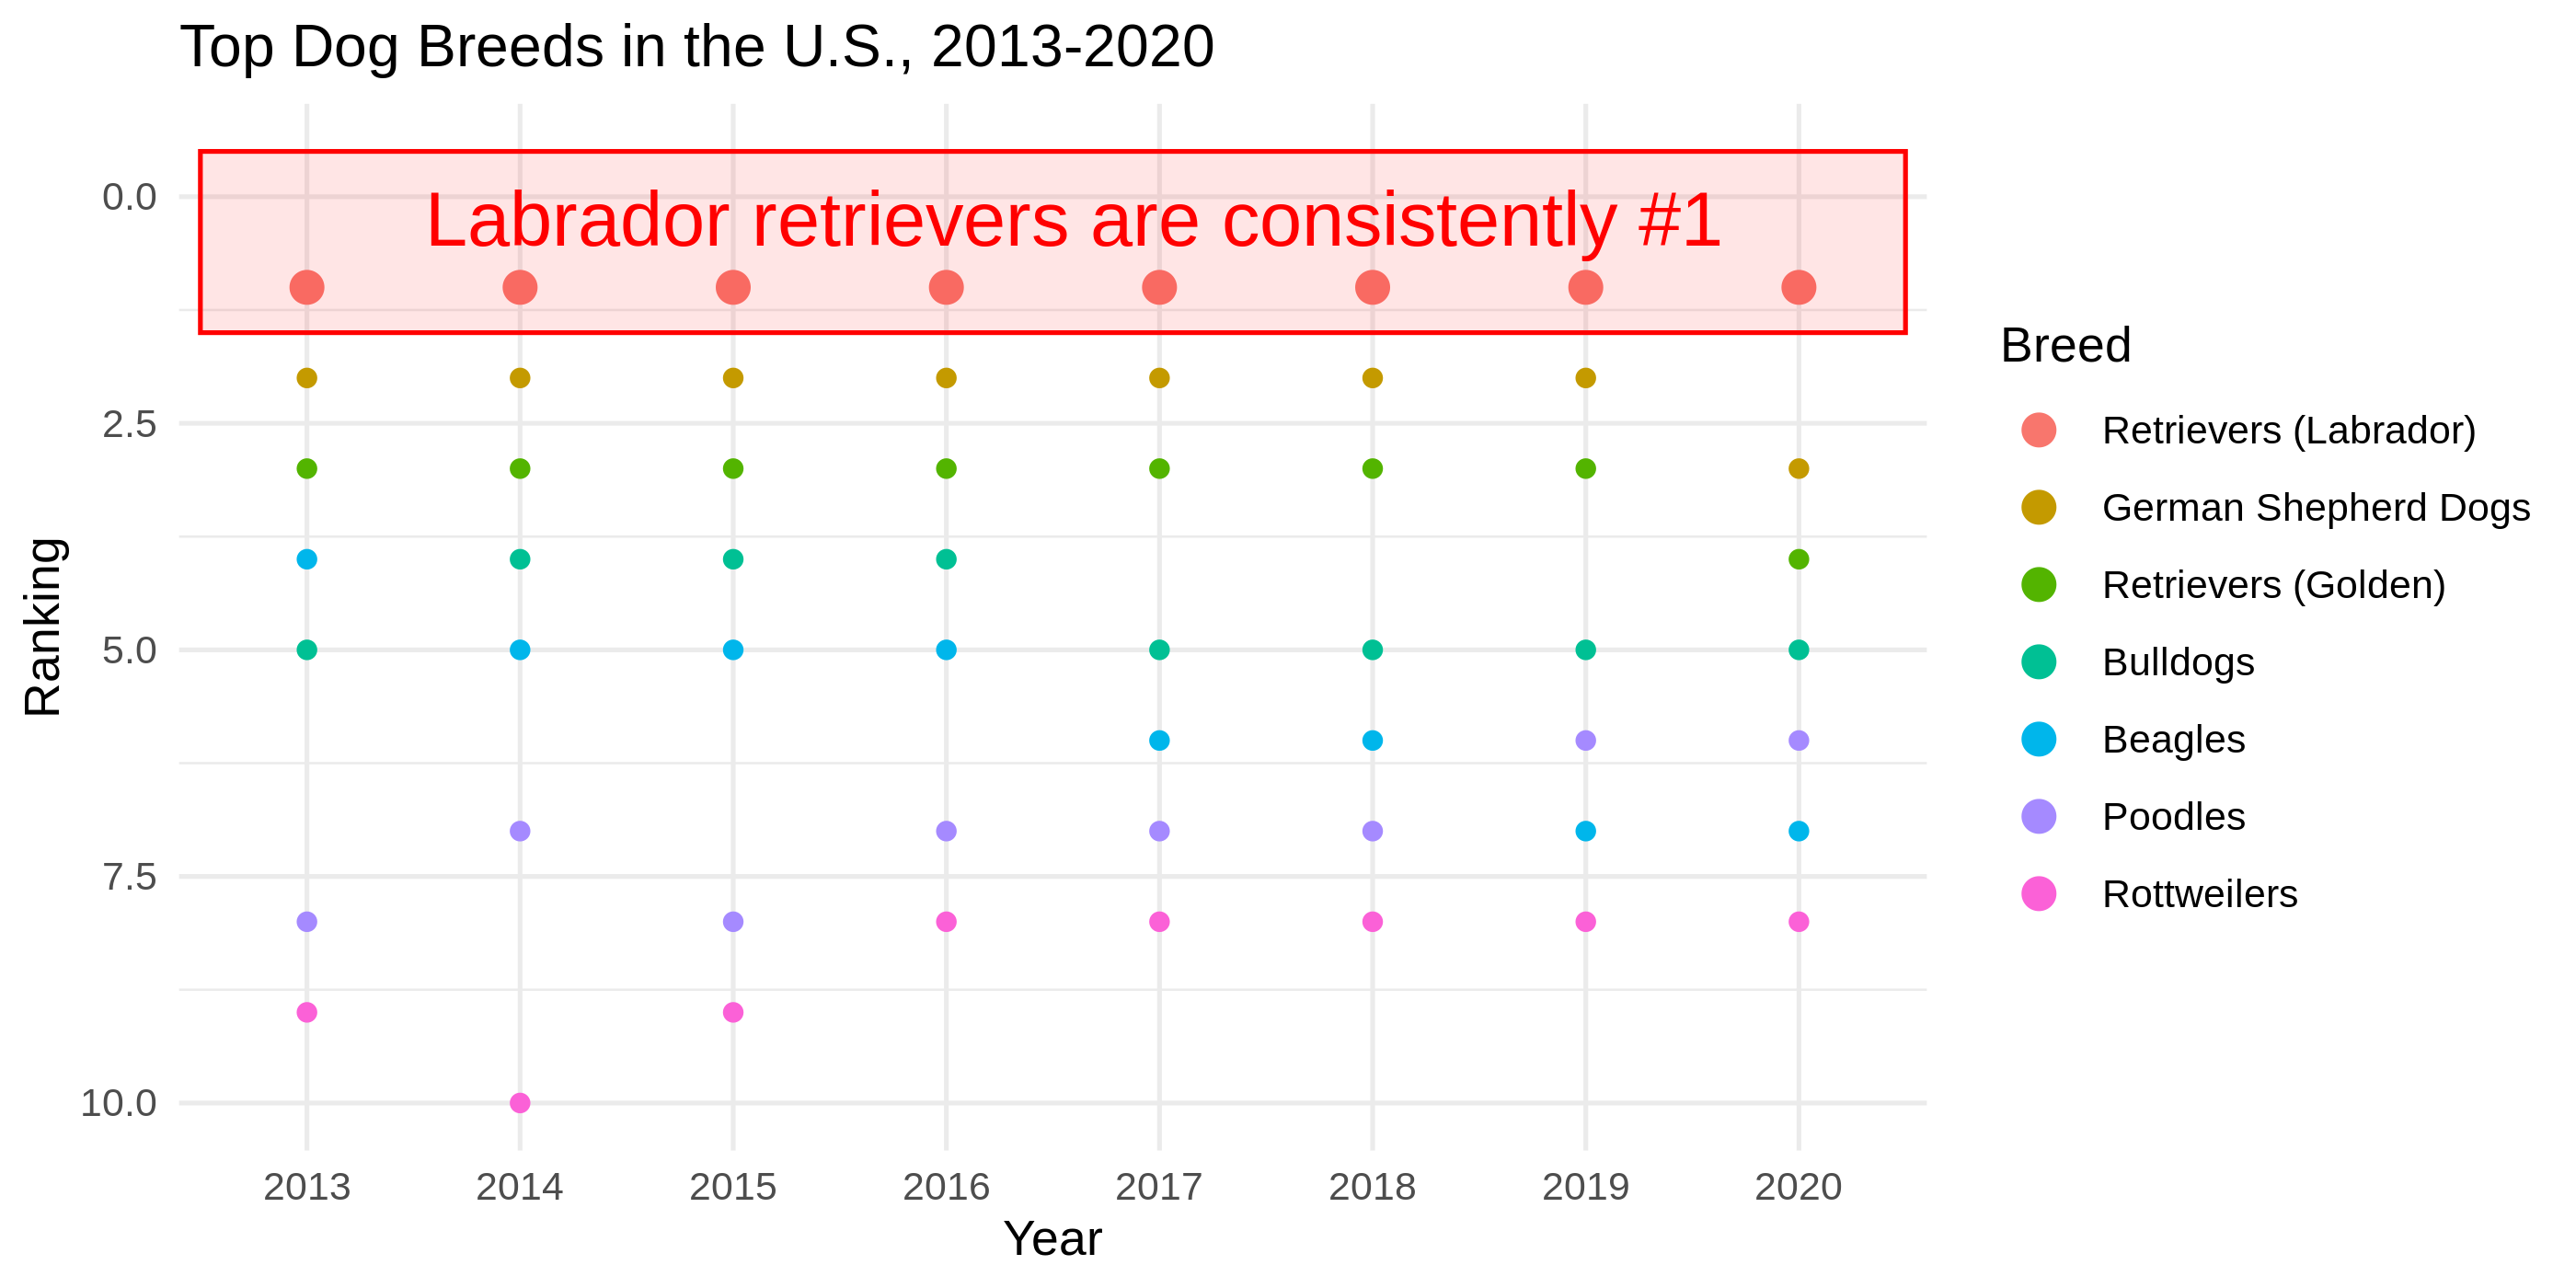

In [7]:
Top10_breed_rank = breed_rank |>
    filter(`2020 Rank`<=10,`2019 Rank`<=10,`2018 Rank`<=10,`2017 Rank`<=10,`2016 Rank`<=10,`2015 Rank`<=10,`2014 Rank`<=10,`2013 Rank`<=10, na.rm = TRUE) |>
    pivot_longer(cols = c('2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank', '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank')) |>
    mutate('Year' =  name, Rank = value) 

levels(Top10_breed_rank$Breed)
Top10_breed_rank$Breed <- factor(Top10_breed_rank$Breed, levels = c("Retrievers (Labrador)", "German Shepherd Dogs", 
                                                                    "Retrievers (Golden)", "Bulldogs", "Beagles", "Poodles", 
                                                                    "Rottweilers", "Pointers (German Shorthaired)", "Dachshunds", 
                                                                    "Pembroke Welsh Corgis", "Yorkshire Terriers", "Boxers")
                                 )

annotation_data = data.frame(
    label = "Labrador retrievers are consistently #1",
    Year = 6.5,
    Rank = 0.25)

highlight_Labrador = Top10_breed_rank |> 
select(Breed, Rank, Year) |>
filter(Breed == "Retrievers (Labrador)") 

options(repr.plot.res = 350, repr.plot.height = 4, repr.plot.width = 8)
p=ggplot(Top10_breed_rank, aes(x=Year, y=Rank, color = Breed)) + 
    geom_point() +
    geom_point(data = highlight_Labrador, aes(x=Year, y=Rank), size = 3) +
    scale_x_discrete(labels = c('2013','2014','2015', '2016', '2017', '2018', '2019', '2020')) + scale_y_reverse() +
    theme_minimal() + 
    labs(x= 'Year', y= 'Ranking', title='Top Dog Breeds in the U.S., 2013-2020') +
    annotate("rect", xmin=c(0.5), xmax=c(8.5), ymin=c(-0.5), ymax=c(1.5), alpha=0.10, color="red", fill="red") +
    geom_text_repel(data=annotation_data, mapping = aes(label = label), color="red", size = 6) 

p





### Now we are going to examine a related dataset on breed traits. We will pull the data for the traits "Affectionate with Family" and "Good with Other Dogs" which are ranked 1-5 where 5 is the most affectionate or most good with other dogs. Then we will join this data set with the Breed Rank dataset above to examine how these traits compare across breeds.

Rows: 195 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Breed, Coat Type, Coat Length
dbl (14): Affectionate With Family, Good With Young Children, Good With Othe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining, by = "Breed"


Breed,Rank,name,value
<fct>,<dbl>,<chr>,<dbl>
Retrievers_(Labrador),1,Affectionate With Family,5
Retrievers_(Labrador),1,Good With Other Dogs,5
German_Shepherd_Dogs,3,Affectionate With Family,5
German_Shepherd_Dogs,3,Good With Other Dogs,3
Retrievers_(Golden),4,Affectionate With Family,5
Retrievers_(Golden),4,Good With Other Dogs,5
Bulldogs,5,Affectionate With Family,4
Bulldogs,5,Good With Other Dogs,3
Poodles,6,Affectionate With Family,5


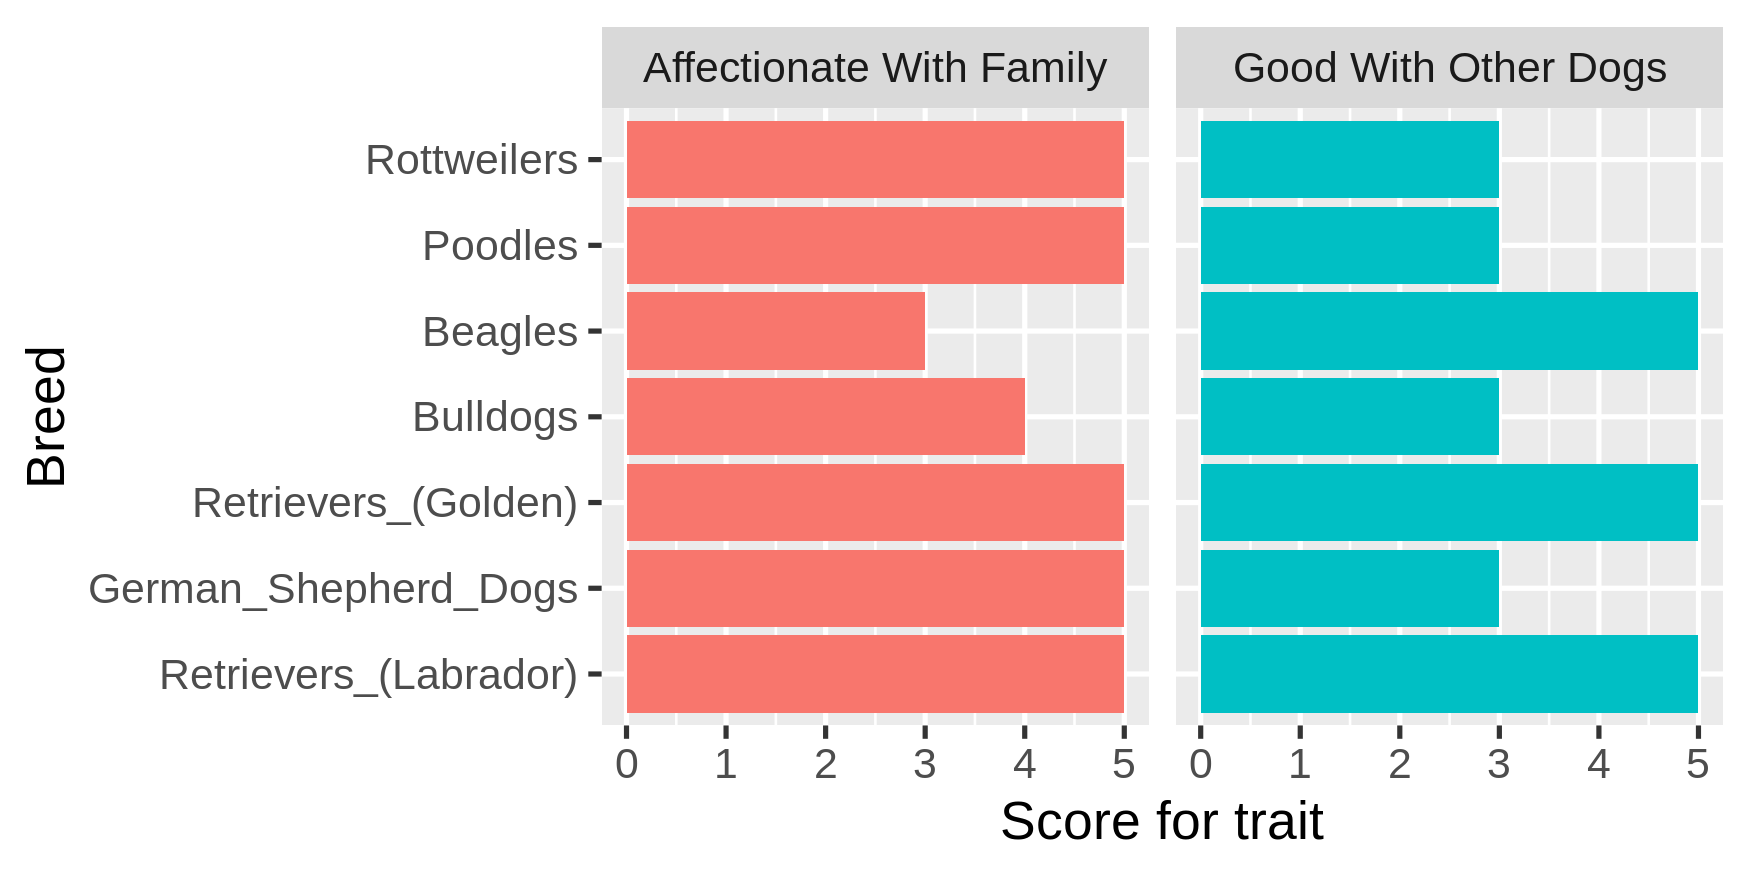

In [11]:
Top10_breed_rank2020 = Top10_breed_rank |>
    filter(Year == "2020 Rank")

breed_traits = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')
Select_traits = breed_traits |> select("Affectionate With Family", "Good With Other Dogs", Breed) 

Select_Traits_Rank_2020 = Top10_breed_rank2020 |>
    mutate(Breed = str_replace_all(Breed, "\\s+", "_")) |>
    left_join(breed_traits |> mutate(Breed = str_replace_all(Breed, "\\s+", "_"))) |>
    select(`Affectionate With Family`, `Good With Other Dogs`, Breed, Rank)

Select_Traits_Rank_2020$Breed <- factor(Select_Traits_Rank_2020$Breed, levels = c("Retrievers_(Labrador)", "German_Shepherd_Dogs", 
                                                                    "Retrievers_(Golden)", "Bulldogs", "Beagles", "Poodles", 
                                                                    "Rottweilers", "Pointers (German Shorthaired)", "Dachshunds", 
                                                                    "Pembroke Welsh Corgis", "Yorkshire_Terriers", "Boxers")
                                 )
options(repr.plot.height = 2.5, repr.plot.width = 5)

Select_Traits_Rank_2020_pivot = Select_Traits_Rank_2020 |>
    pivot_longer(cols = c(`Affectionate With Family`, `Good With Other Dogs`))

p = ggplot(Select_Traits_Rank_2020_pivot, aes(y = Breed, x = value, fill = name)) + 
    geom_col() +
    facet_wrap(~name, ncol = 2) +
    labs(x = 'Score for trait') +
    theme(legend.position = 'none')

p

### As you can see from the bar charts above, Retrievers (both Labrador and Golden retrievers) are the only breed that score 5/5 on both "Affectionate with Family" and "Good with Other Dogs."